In [4]:
"""
@author: JosephNelson
"""
'''
Introduction
We've discussed overfitting in the context of bias and variance, and we've seen some techniques 
like regularization that are used to avoid overfitting. In this lesson we'll discuss another method for 
avoid overfitting that is commonly referred to a the train/test split. The idea is very similar to 
cross-validation (indeed it is a type of cross-validation) in that we split the dataset into two subsets:
a subset to train our model on, and a subset to test our model's predictions on.
This serves two useful purposes:
We prevent overfitting by not using all the data, and
We have some remaining data to evaluate our model.
While it may seem like a relatively simple idea, there are some caveats to putting it into practice. 
For example, if you are not careful it is easy to take a non-random split. Suppose we have salary data on
technical professionals that is composed 80% of data from California and 20% elsewhere and is sorted by state.
If we split our data into 80% training data and 20% testing data we ight inadvertantly select all the
California data to train and all the non-California data to test. In this case we've still overfit on 
our data set because we did not sufficiently randomize the data.
In a situation like this we can use k-fold cross validation, which is the same idea applied to more 
than two subsets. In particular, we partition our data into k subsets and train on k−1 one of them. 
Holding the last slice for testing. We can do this for each of the possible k−1 subsets.
Demo
Let's explore test-training split with some sample datasets.
'''

"\nIntroduction\nWe've discussed overfitting in the context of bias and variance, and we've seen some techniques \nlike regularization that are used to avoid overfitting. In this lesson we'll discuss another method for \navoid overfitting that is commonly referred to a the train/test split. The idea is very similar to \ncross-validation (indeed it is a type of cross-validation) in that we split the dataset into two subsets:\na subset to train our model on, and a subset to test our model's predictions on.\nThis serves two useful purposes:\nWe prevent overfitting by not using all the data, and\nWe have some remaining data to evaluate our model.\nWhile it may seem like a relatively simple idea, there are some caveats to putting it into practice. \nFor example, if you are not careful it is easy to take a non-random split. Suppose we have salary data on\ntechnical professionals that is composed 80% of data from California and 20% elsewhere and is sorted by state.\nIf we split our data into 

In [5]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd

import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [7]:
# Load the diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target
# Take a look at the data again
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [3]:
df.shape

(442, 10)

In [ ]:
'''
Scikit-learn has a nice function to split a dataset for testing and training called train_test_split.
The test_size keyword argument indicates the proportion of the data that should be held over for testing.
'''

In [4]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(309, 10) (309,)
(133, 10) (133,)


In [5]:
# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [6]:
print lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


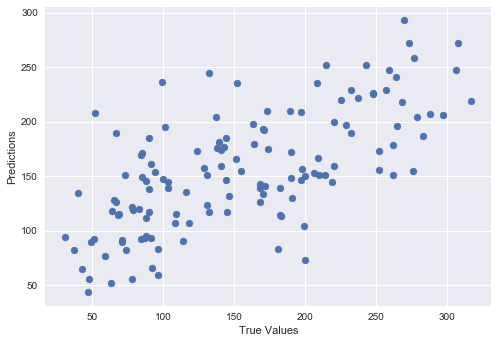

In [7]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [8]:
print "Score:", model.score(X_test, y_test)     

Score: 0.452006781878


In [10]:
'''
Now let's try out k-fold cross-validation. Again scikit-learn provides useful functions to do the heavy lifting. The function cross_val_predict returns the predicted values for each data point when it's in the testing slice.
'''

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [11]:
# Perform 6-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=6)
print "Cross-validated scores:", scores
print "Average: ", scores.mean()

Cross-validated scores: [ 0.63421016  0.35196772  0.35055282  0.51942512  0.54624063  0.61569638]
Average:  0.503015471001


Cross-Predicted Accuracy: 0.490806583864


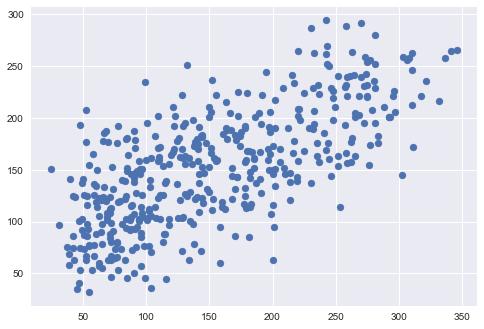

In [14]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy